# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Setelah terhubung, bisa langsung akses file dari Google Drive
import pandas as pd

# Path dasar folder
base_path = '/content/drive/MyDrive/Rakamin Dataset/'

# Load file utama dan tambahan
application_train = pd.read_csv(base_path + 'application_train.csv')
application_test = pd.read_csv(base_path + 'application_test.csv')
bureau = pd.read_csv(base_path + 'bureau.csv')
bureau_balance = pd.read_csv(base_path + 'bureau_balance.csv')
credit_card_balance = pd.read_csv(base_path + 'credit_card_balance.csv')
installments_payments = pd.read_csv(base_path + 'installments_payments.csv')
POS_CASH_balance = pd.read_csv(base_path + 'POS_CASH_balance.csv')
previous_application = pd.read_csv(base_path + 'previous_application.csv')
sample_submission = pd.read_csv(base_path + 'sample_submission.csv')

# Cek ukuran dataset
print(f"application_train: {application_train.shape}")
print(f"application_test: {application_test.shape}")
print(f"bureau: {bureau.shape}")
print(f"bureau_balance: {bureau_balance.shape}")
print(f"credit_card_balance: {credit_card_balance.shape}")
print(f"installments_payments: {installments_payments.shape}")
print(f"POS_CASH_balance: {POS_CASH_balance.shape}")
print(f"previous_application: {previous_application.shape}")
print(f"sample_submission: {sample_submission.shape}")


Mounted at /content/drive
application_train: (307511, 122)
application_test: (48744, 121)
bureau: (1716428, 17)
bureau_balance: (27299925, 3)
credit_card_balance: (3840312, 23)
installments_payments: (13605401, 8)
POS_CASH_balance: (10001358, 8)
previous_application: (1670214, 37)
sample_submission: (48744, 2)


# Load Dataset

In [ ]:
df = application_train.copy()
df


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Missing Values Checking

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(f"Ada {len(missing)} kolom yang memiliki missing values.")
missing


Ada 67 kolom yang memiliki missing values.


,0
COMMONAREA_MEDI,214865
COMMONAREA_MODE,214865
COMMONAREA_AVG,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_MEDI,213514
...,...
EXT_SOURCE_2,660
AMT_GOODS_PRICE,278
AMT_ANNUITY,12
CNT_FAM_MEMBERS,2


In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent


,0
COMMONAREA_MEDI,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_AVG,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
...,...
EXT_SOURCE_2,0.214626
AMT_GOODS_PRICE,0.090403
AMT_ANNUITY,0.003902
CNT_FAM_MEMBERS,0.000650


Terdapat beberapa kolom yang memiliki nilai kosong sangat banyak, lebih dari 60%. Di sini diputuskan bahwa akan menghapus kolom yang memiliki nilai kosong lebih dari 50%.

## Missing Values Handling

In [ ]:
missing_over_50 = missing_percent[missing_percent > 50].index
df.drop(columns=missing_over_50, inplace=True)
print(f"{len(missing_over_50)} kolom dihapus karena missing > 50%")


41 kolom dihapus karena missing > 50%


dari 67 kolom yang memiliki nilai kosong, 41 di antaranya dihapus dan sisanya akan di-*handle* dengan median dan modus.

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
(df.isnull().sum() / len(df)).sort_values(ascending=False).head(10)


,0
SK_ID_CURR,0.0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
FLAG_OWN_REALTY,0.0
CNT_CHILDREN,0.0
AMT_INCOME_TOTAL,0.0
AMT_CREDIT,0.0
AMT_ANNUITY,0.0


In [ ]:
print("Total missing setelah imputasi:", df.isnull().sum().sum())


Total missing setelah imputasi: 0


# Encoding

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')


Kolom yang memiliki jenis kategorikal kecil (<3) akan diubah menggunakan Label Encoder sedangkan untuk kategorikal besar (>3) diubah menggunakan OneHot Encoder.

In [ ]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


NAME_CONTRACT_TYPE: 2 unique values
CODE_GENDER: 3 unique values
FLAG_OWN_CAR: 2 unique values
FLAG_OWN_REALTY: 2 unique values
NAME_TYPE_SUITE: 7 unique values
NAME_INCOME_TYPE: 8 unique values
NAME_EDUCATION_TYPE: 5 unique values
NAME_FAMILY_STATUS: 6 unique values
NAME_HOUSING_TYPE: 6 unique values
OCCUPATION_TYPE: 18 unique values
WEEKDAY_APPR_PROCESS_START: 7 unique values
ORGANIZATION_TYPE: 58 unique values
EMERGENCYSTATE_MODE: 2 unique values


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe agar aman
df_encoded = df.copy()

# Pisahkan kolom kategorikal
cat_cols = df_encoded.select_dtypes(include='object').columns

# Inisialisasi encoder
le = LabelEncoder()

# Loop untuk encode
for col in cat_cols:
    unique_vals = df_encoded[col].nunique()

    if unique_vals <= 3:
        # Gunakan LabelEncoder untuk kategori kecil
        df_encoded[col] = le.fit_transform(df_encoded[col])
        print(f"{col} encoded dengan LabelEncoder ({unique_vals} kategori)")
    else:
        # Gunakan OneHot untuk kategori besar
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded.drop(columns=col), dummies], axis=1)
        print(f"{col} encoded dengan OneHot ({unique_vals} kategori)")


NAME_CONTRACT_TYPE encoded dengan LabelEncoder (2 kategori)
CODE_GENDER encoded dengan LabelEncoder (3 kategori)
FLAG_OWN_CAR encoded dengan LabelEncoder (2 kategori)
FLAG_OWN_REALTY encoded dengan LabelEncoder (2 kategori)
NAME_TYPE_SUITE encoded dengan OneHot (7 kategori)
NAME_INCOME_TYPE encoded dengan OneHot (8 kategori)
NAME_EDUCATION_TYPE encoded dengan OneHot (5 kategori)
NAME_FAMILY_STATUS encoded dengan OneHot (6 kategori)
NAME_HOUSING_TYPE encoded dengan OneHot (6 kategori)
OCCUPATION_TYPE encoded dengan OneHot (18 kategori)
WEEKDAY_APPR_PROCESS_START encoded dengan OneHot (7 kategori)
ORGANIZATION_TYPE encoded dengan OneHot (58 kategori)
EMERGENCYSTATE_MODE encoded dengan LabelEncoder (2 kategori)


In [ ]:
print("Shape awal:", df.shape)
print("Shape setelah encoding:", df_encoded.shape)


Shape awal: (307511, 81)
Shape setelah encoding: (307511, 180)


# Quick Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur dan target
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
 # Inisialisasi dan fit model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Ambil importance dan nama fitur
importances = rf.feature_importances_
feature_names = X.columns

# Gabungkan ke dalam dataframe
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


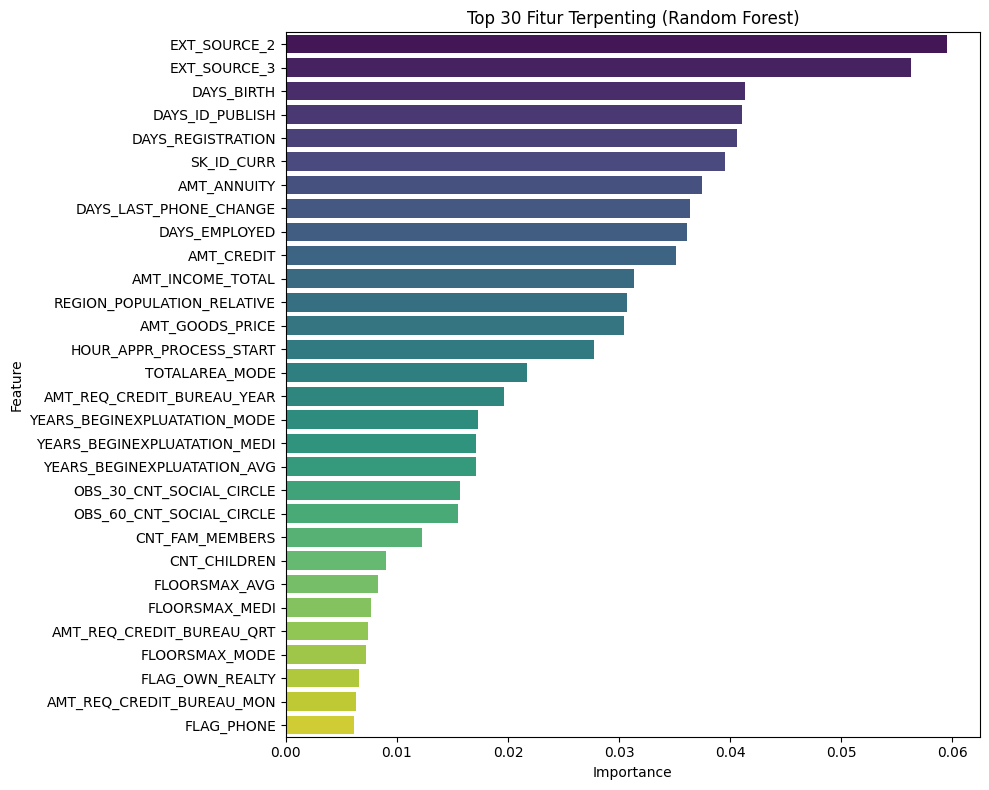

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 30
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importances_df.head(top_n),
    palette='viridis'
)
plt.title(f'Top {top_n} Fitur Terpenting (Random Forest)')
plt.tight_layout()
plt.show()


In [ ]:
# Ambil fitur dengan importance ≥ 0.01
important_features = importances_df[importances_df['Importance'] >= 0.01]['Feature'].tolist()

print(f"Jumlah fitur dengan importance ≥ 0.01: {len(important_features)}")


Jumlah fitur dengan importance ≥ 0.01: 22


In [ ]:
print("Fitur penting (≥ 0.01):")
print(important_features)


Fitur penting (≥ 0.01):
['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'SK_ID_CURR', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS']


# EDA

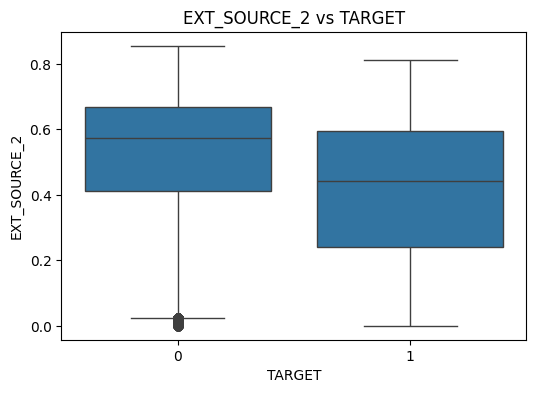

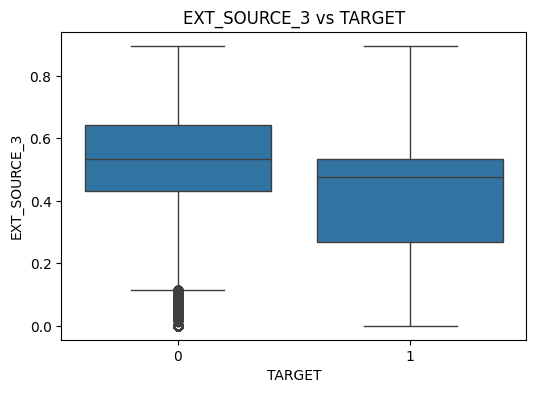

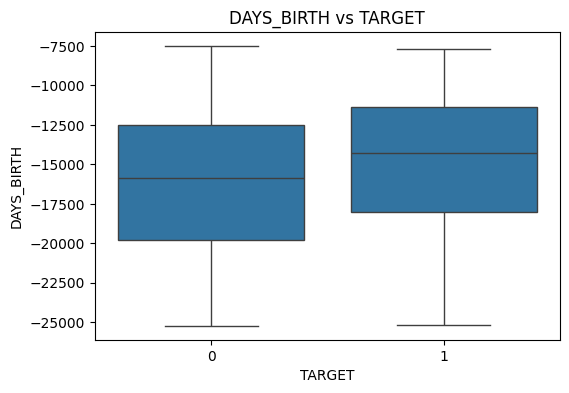

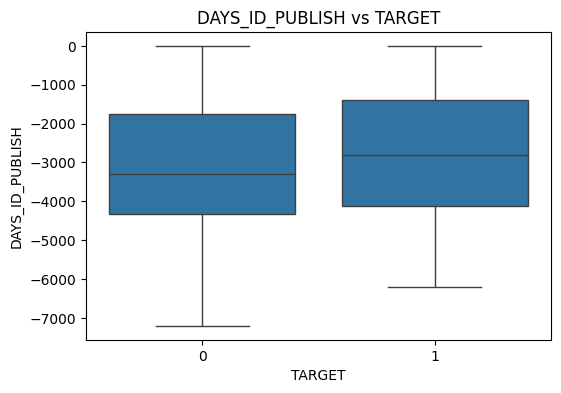

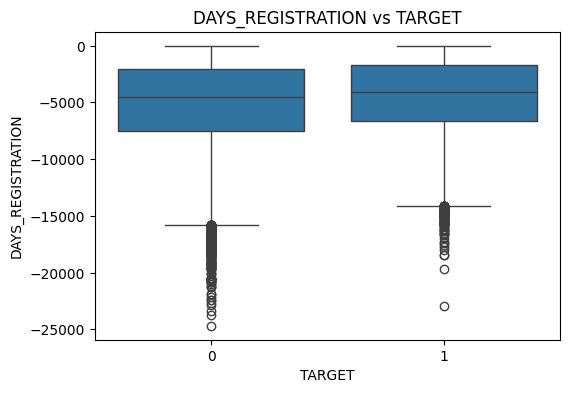

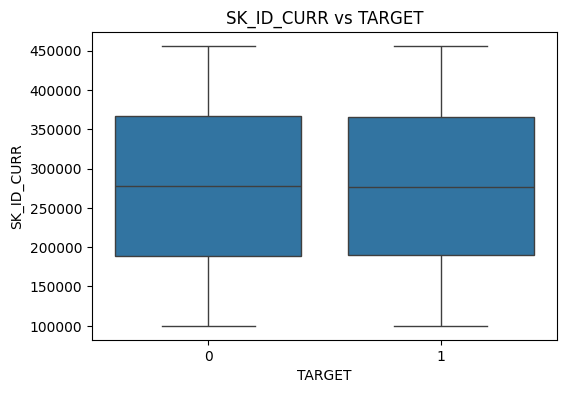

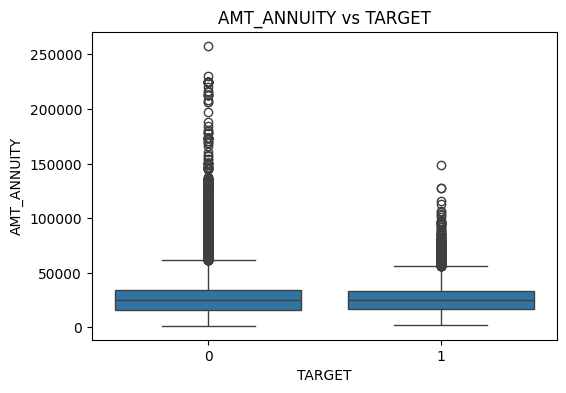

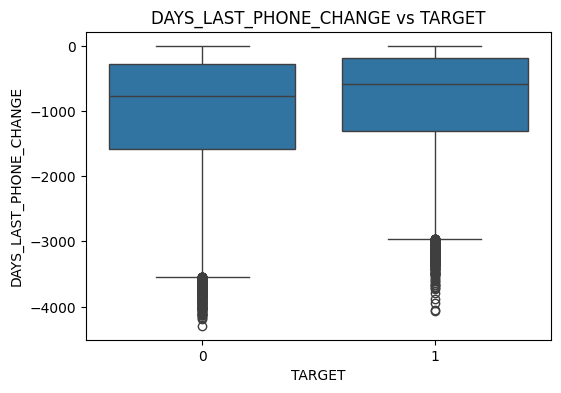

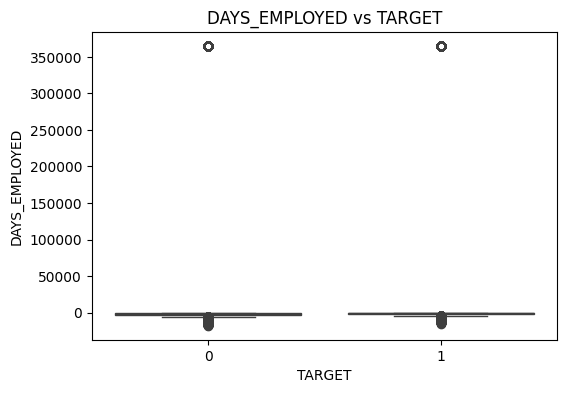

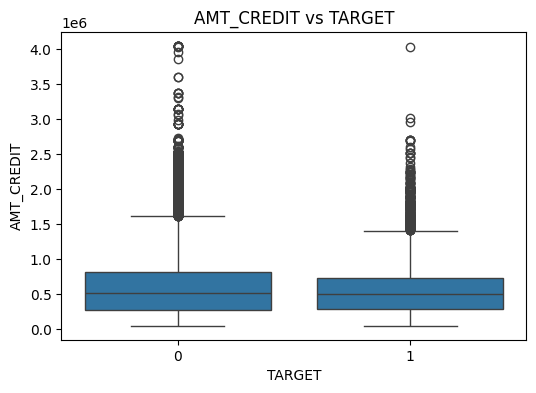

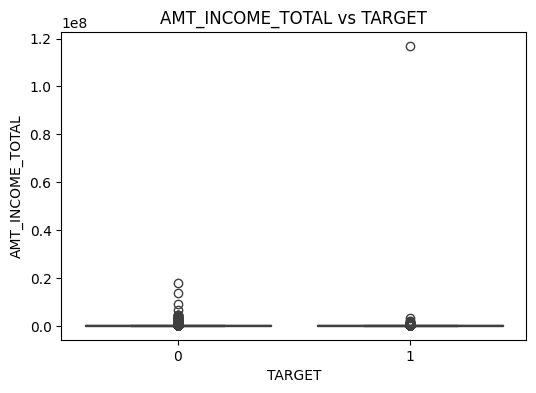

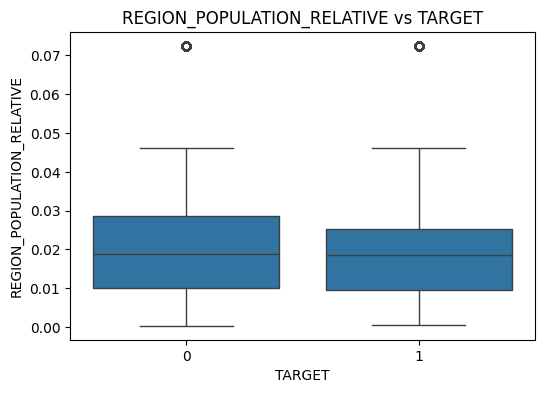

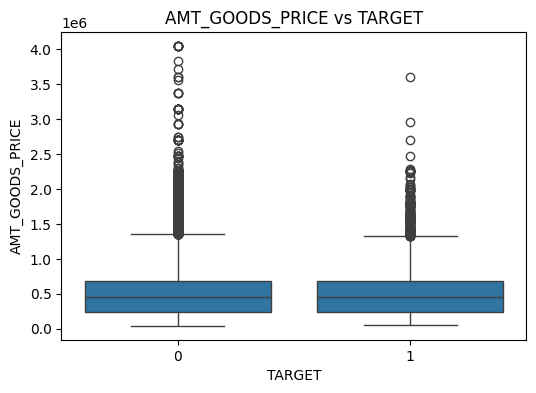

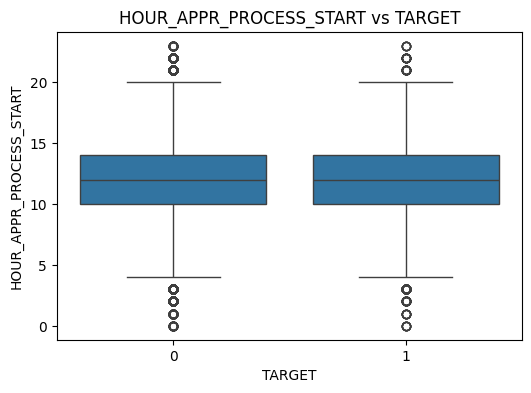

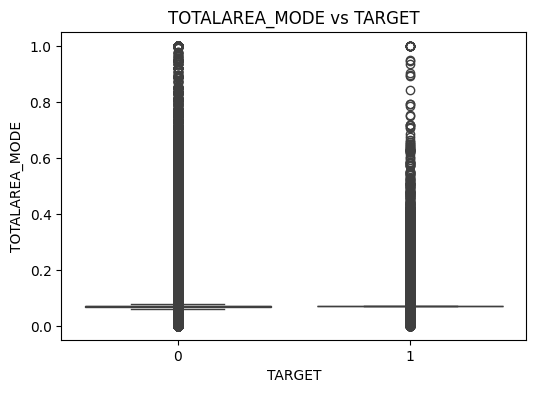

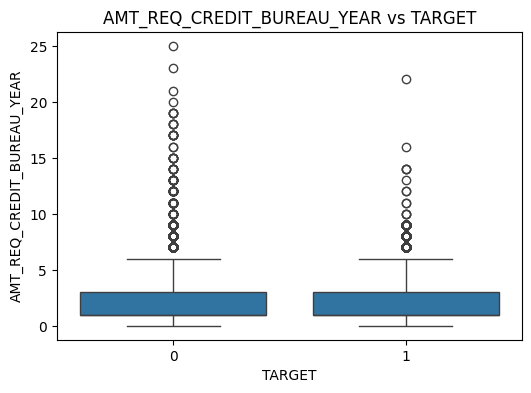

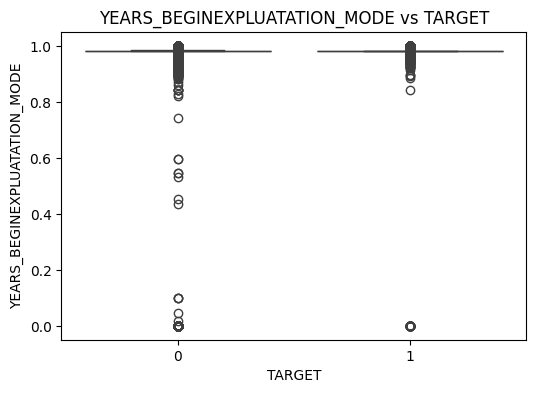

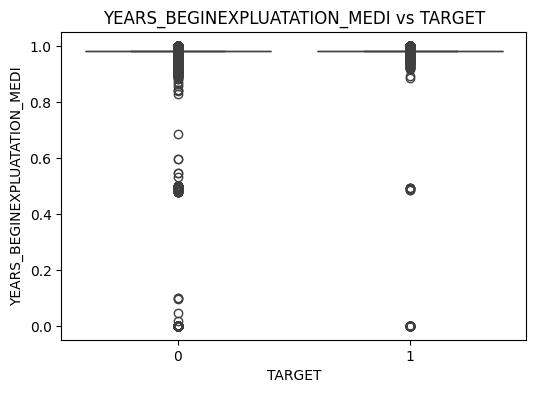

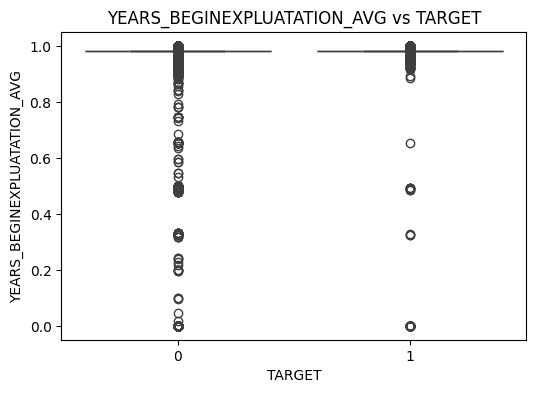

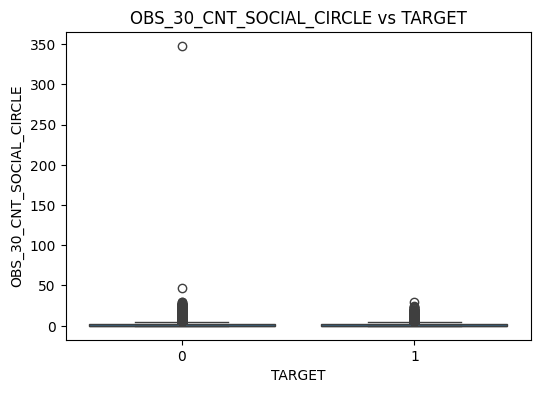

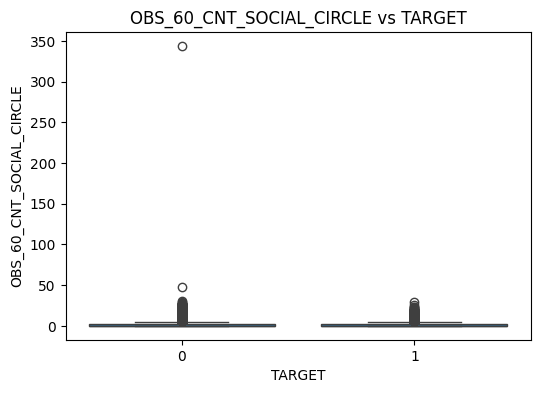

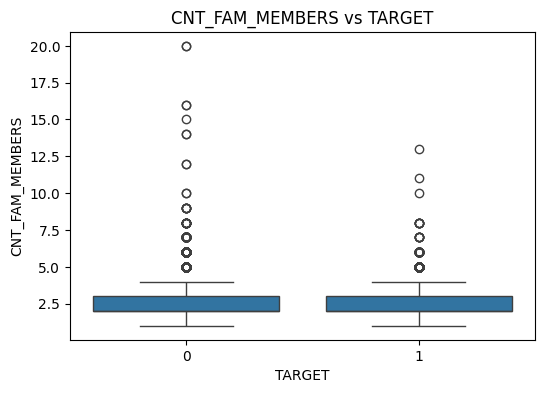

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

important_features = importances_df[importances_df['Importance'] >= 0.01]['Feature'].tolist()

# Buat visualisasi boxplot per fitur
for col in important_features:
    if df_encoded[col].nunique() > 10:  # anggap numerik
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df_encoded['TARGET'], y=df_encoded[col])
        plt.title(f'{col} vs TARGET')
        plt.show()


Dua fitur terbaik berdasarkan feature importance adalah `EXT_SOURCE_2` dan `EXT_SOURCE_3`. Keduanya merupakan skor eksternal dari pihak ketiga yang merepresentasikan risiko kredit pelanggan (semakin tinggi, semakin kecil risiko gagal bayar).

Namun, berdasarkan visualisasi boxplot:

1. **EXT_SOURCE_2 vs TARGET**
   - Nasabah dengan `TARGET = 1` (gagal bayar) cenderung memiliki **median nilai EXT_SOURCE_2 yang lebih rendah** dibanding `TARGET = 0` (nasabah lancar).
   - Artinya, nilai **EXT_SOURCE_2 berbanding terbalik** dengan kemungkinan gagal bayar.
   - Meskipun termasuk fitur terpenting, kontribusinya **negatif** terhadap prediksi gagal bayar (semakin tinggi nilainya, semakin aman).

2. **EXT_SOURCE_3 vs TARGET**
   - Pola yang serupa terlihat pada `EXT_SOURCE_3`, di mana nasabah gagal bayar (`TARGET = 1`) memiliki skor yang **lebih rendah** daripada nasabah yang lancar (`TARGET = 0`).
   - Median dari `TARGET = 1` berada di bawah 0.5, sedangkan `TARGET = 0` mendekati 0.6.

🔍 **Kesimpulan**:
- Kedua fitur ini meskipun nilainya tinggi dalam importance model, **mengarah negatif** (semakin tinggi skor = semakin aman).
- Oleh karena itu, dalam interpretasi bisnis: **fitur-fitur ini penting sebagai indikator perlindungan** — skor tinggi = nasabah lebih layak, skor rendah = perlu diwaspadai.



In [ ]:
#for col in important_features:
#    if df_encoded[col].nunique() <= 3:  # anggap dummy/biner
#        ct = pd.crosstab(df_encoded[col], df_encoded['TARGET'], normalize='index')
#        ct.plot(kind='bar', stacked=True, figsize=(5, 3), colormap='Set2')
#        plt.title(f'{col} vs TARGET')
#        plt.ylabel('Proportion')
#        plt.show()


In [ ]:
# Cek fitur yang dianggap biner/kategorikal
#for col in important_features:
#    if df_encoded[col].nunique() <= 3:
#        print(f"{col} - {df_encoded[col].nunique()} unique values")


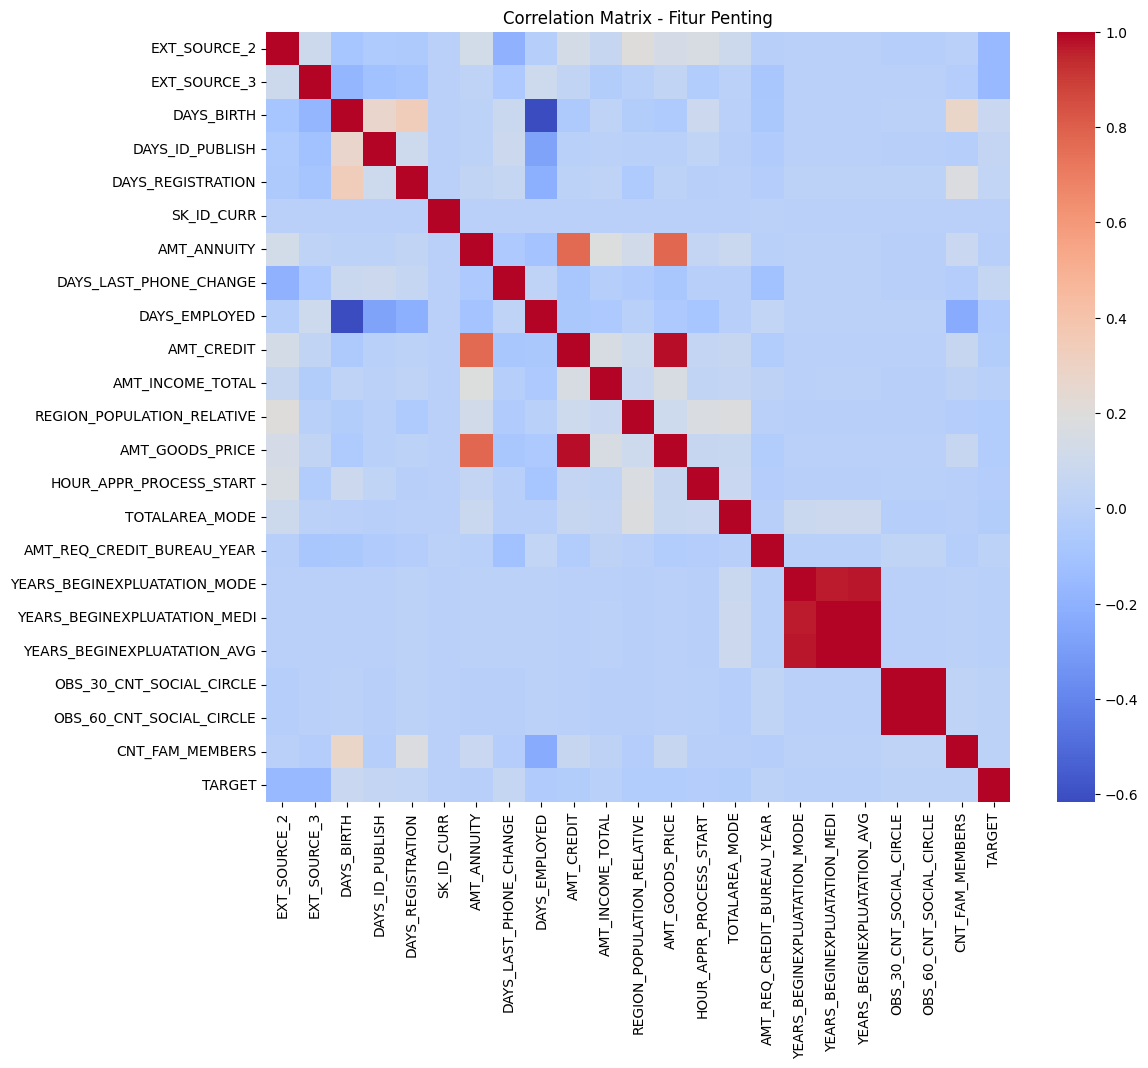

Korelasi fitur penting terhadap TARGET (dari paling kuat):

DAYS_BIRTH                      0.078239
DAYS_LAST_PHONE_CHANGE          0.055218
DAYS_ID_PUBLISH                 0.051457
DAYS_REGISTRATION               0.041975
AMT_REQ_CREDIT_BUREAU_YEAR      0.012161
OBS_30_CNT_SOCIAL_CIRCLE        0.009447
OBS_60_CNT_SOCIAL_CIRCLE        0.009337
CNT_FAM_MEMBERS                 0.009308
SK_ID_CURR                     -0.002108
AMT_INCOME_TOTAL               -0.003982
YEARS_BEGINEXPLUATATION_MODE   -0.004061
YEARS_BEGINEXPLUATATION_AVG    -0.004665
YEARS_BEGINEXPLUATATION_MEDI   -0.004872
AMT_ANNUITY                    -0.012815
HOUR_APPR_PROCESS_START        -0.024166
TOTALAREA_MODE                 -0.030214
AMT_CREDIT                     -0.030369
REGION_POPULATION_RELATIVE     -0.037227
AMT_GOODS_PRICE                -0.039623
DAYS_EMPLOYED                  -0.044932
EXT_SOURCE_3                   -0.155892
EXT_SOURCE_2                   -0.160295
Name: TARGET, dtype: float64


In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded[important_features + ['TARGET']].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix - Fitur Penting")
plt.show()

# Hitung korelasi semua fitur penting terhadap TARGET
correlation_with_target = df_encoded[important_features + ['TARGET']].corr()['TARGET'].drop('TARGET')

# Urutkan dari yang paling tinggi ke rendah (absolut)
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Tampilkan hasilnya
print("Korelasi fitur penting terhadap TARGET (dari paling kuat):\n")
print(correlation_sorted)



# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# Subset X
X_selected = X[important_features]

# Train-test split
X_train_sel, X_test_sel, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)


In [ ]:
model_results = []


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_sel, y_train)
y_pred_log = logreg.predict(X_test_sel)
y_proba_log = logreg.predict_proba(X_test_sel)[:, 1]

print("🔹 Logistic Regression:\n")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_proba_log))

# Simpan hasil evaluasi ke dalam model_results
model_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_log),
    'Recall_1': recall_score(y_test, y_pred_log, pos_label=1, zero_division=0),
    'Precision_1': precision_score(y_test, y_pred_log, pos_label=1, zero_division=0),
    'F1_1': f1_score(y_test, y_pred_log, pos_label=1, zero_division=0),
    'ROC_AUC': roc_auc_score(y_test, y_proba_log)
})


🔹 Logistic Regression:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503

ROC AUC: 0.6318934369741002


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sel, y_train)
y_pred_rf = rf.predict(X_test_sel)
y_proba_rf = rf.predict_proba(X_test_sel)[:, 1]

print("🔹 Random Forest:\n")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

# Simpan hasil evaluasi ke dalam model_results
model_results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Recall_1': recall_score(y_test, y_pred_rf, pos_label=1, zero_division=0),
    'Precision_1': precision_score(y_test, y_pred_rf, pos_label=1, zero_division=0),
    'F1_1': f1_score(y_test, y_pred_rf, pos_label=1, zero_division=0),
    'ROC_AUC': roc_auc_score(y_test, y_proba_rf)
})


🔹 Random Forest:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.57      0.01      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.74      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503

ROC AUC: 0.7001130739969873


## XGBoost

In [ ]:
from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_sel, y_train)
y_pred_xgb = xgb.predict(X_test_sel)
y_proba_xgb = xgb.predict_proba(X_test_sel)[:, 1]

print("🔹 XGBoost:\n")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

# Logging ke model_results
model_results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Recall_1': recall_score(y_test, y_pred_xgb, pos_label=1, zero_division=0),
    'Precision_1': precision_score(y_test, y_pred_xgb, pos_label=1, zero_division=0),
    'F1_1': f1_score(y_test, y_pred_xgb, pos_label=1, zero_division=0),
    'ROC_AUC': roc_auc_score(y_test, y_proba_xgb)
})



🔹 XGBoost:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.44      0.02      0.04      4949

    accuracy                           0.92     61503
   macro avg       0.68      0.51      0.50     61503
weighted avg       0.88      0.92      0.88     61503

ROC AUC: 0.7313121387039123


## CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train_sel, y_train)
y_pred_cat = cat.predict(X_test_sel)
y_proba_cat = cat.predict_proba(X_test_sel)[:, 1]

print("🔹 CatBoost:\n")
print(classification_report(y_test, y_pred_cat))
print("ROC AUC:", roc_auc_score(y_test, y_proba_cat))

# Logging ke model_results
model_results.append({
    'Model': 'CatBoost',
    'Accuracy': accuracy_score(y_test, y_pred_cat),
    'Recall_1': recall_score(y_test, y_pred_cat, pos_label=1, zero_division=0),
    'Precision_1': precision_score(y_test, y_pred_cat, pos_label=1, zero_division=0),
    'F1_1': f1_score(y_test, y_pred_cat, pos_label=1, zero_division=0),
    'ROC_AUC': roc_auc_score(y_test, y_proba_cat)
})



🔹 CatBoost:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.50      0.02      0.04      4949

    accuracy                           0.92     61503
   macro avg       0.71      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503

ROC AUC: 0.7410976548980811


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sel, y_train)
y_pred_dt = dt.predict(X_test_sel)
y_proba_dt = dt.predict_proba(X_test_sel)[:, 1]

print("🔹 Decision Tree:\n")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))

# Logging ke model_results
model_results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Recall_1': recall_score(y_test, y_pred_dt, pos_label=1, zero_division=0),
    'Precision_1': precision_score(y_test, y_pred_dt, pos_label=1, zero_division=0),
    'F1_1': f1_score(y_test, y_pred_dt, pos_label=1, zero_division=0),
    'ROC_AUC': roc_auc_score(y_test, y_proba_dt)
})



🔹 Decision Tree:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     56554
           1       0.14      0.16      0.15      4949

    accuracy                           0.85     61503
   macro avg       0.53      0.54      0.53     61503
weighted avg       0.86      0.85      0.86     61503

ROC AUC: 0.5368915857544243


# Model Summary

In [ ]:
results_df = pd.DataFrame(model_results)
results_df.sort_values('ROC_AUC', ascending=False)


,Model,Accuracy,Recall_1,Precision_1,F1_1,ROC_AUC
3,CatBoost,0.919549,0.022429,0.502262,0.042940,0.741098
2,XGBoost,0.919110,0.018994,0.439252,0.036413,0.731312
1,Random Forest,0.919662,0.006668,0.568966,0.013182,0.700113
0,Logistic Regression,0.919516,0.000000,0.000000,0.000000,0.631893
4,Decision Tree,0.850219,0.163467,0.137562,0.149400,0.536892


Berdasarkan metrik yang telah ditetapkan, Model CatBoost adalah model terbaik dengan ROC-AUC tertinggi di antara model lain sehingga model ini dianggap paling bagus untuk *case* pinjaman ini.